missing pattern value

In [17]:
'''
This module implements the missing values table in Rattle, using Python

@Author: Charini Nanayakkara
'''

import sys
import pandas as pd

file_name = sys.argv[1]
file_name='data_wrangling_medical_2024_u7568823.csv'
pattern_count_dict = {} # Dictionary to store patterns of row values (as in 
                        # rattle missing file table). The key is a pattern. The
                        # value is a tuple where the first value indicates the
                        # number of times a pattern occurs and the second value
                        # tells the number of variables with missing values per
                        # each pattern. 
table_value_list = [] # Table to contain missing value data as list of lists.
                      # The first value in the sub list is the missing value count 
                      # per row. Second value is a tuple containing the pattern
                      # and the missing variables per pattern.

df = pd.read_csv(file_name)
selected_columns = df[['postcode', 'phone', 'email']]
# null_table = df.isnull()
null_table = selected_columns.isnull()
tot_missing_vals_per_var = null_table.sum(axis=0) # Total missing values per variable
total_missing_vals = tot_missing_vals_per_var.sum() # Total missing values

for index, row in null_table.iterrows():
  count,var_no = pattern_count_dict.get(tuple(row),(0,0))
  count += 1
  var_no = sum(row) # True = 1 and False = 0. Therefore, null values are counted
  pattern_count_dict[tuple(row)] = (count,var_no)
  

for key,value in pattern_count_dict.items():
  table_value_list.append([value[0], [int(not item) for item in key] + [value[1]]])
  
table_value_list.sort(reverse=True)

table_value_list.append(['',tot_missing_vals_per_var.tolist() + \
                         [total_missing_vals]])


data = [item[1] for item in table_value_list] # Data to write to table
columns_list = tot_missing_vals_per_var.index.tolist() + ['']
index_list = [item[0] for item in table_value_list]
# Create new pandas DataFrame 
new_df = pd.DataFrame(data, columns = columns_list, index = index_list) 
print('---------------')
print (new_df)


---------------
      postcode  phone  email       
6771         1      1      1      0
4573         1      0      1      1
2809         1      1      0      1
1874         1      0      0      2
1641         0      1      1      1
1145         0      0      1      2
692          0      1      0      2
495          0      0      0      3
          3973   8087   5870  17930


In [18]:
'''
This module implements the missing values table in Rattle, using Python

@Author: Charini Nanayakkara
'''

import sys
import pandas as pd
from scipy.stats import pearsonr, spearmanr
 
file_name='data_wrangling_medical_2024_u7568823.csv'
pattern_count_dict = {} # Dictionary to store patterns of row values (as in 
                        # rattle missing file table). The key is a pattern. The
                        # value is a tuple where the first value indicates the
                        # number of times a pattern occurs and the second value
                        # tells the number of variables with missing values per
                        # each pattern. 
table_value_list = [] # Table to contain missing value data as list of lists.
                      # The first value in the sub list is the missing value count 
                      # per row. Second value is a tuple containing the pattern
                      # and the missing variables per pattern.

df = pd.read_csv(file_name)
# Select the relevant columns
bmi_age_df = df[['bmi', 'age_at_consultation']]
 
 # Calculate the Pearson correlation coefficient
correlation = bmi_age_df.corr(method='pearson')

# Print the correlation matrix
print(correlation)
print('---------------')
correlation = bmi_age_df.corr(method='spearman')

# Print the correlation matrix
print(correlation)
print('---------------')
# Extract relevant columns
bmi = df['bmi']
age = df['age_at_consultation']
correlation, p_value = pearsonr(bmi, age)

print(f"Correlation: {correlation}")
print(f"p-value: {p_value}")

# Calculate Spearman correlation and p-value
spearman_corr, spearman_p_value = spearmanr(bmi, age)
print(f"Spearman Correlation: {spearman_corr}, p-value: {spearman_p_value}")

                          bmi  age_at_consultation
bmi                  1.000000             0.249928
age_at_consultation  0.249928             1.000000
---------------
                          bmi  age_at_consultation
bmi                  1.000000             0.265988
age_at_consultation  0.265988             1.000000
---------------
Correlation: 0.24992826361287138
p-value: 1.8205736364367322e-282
Spearman Correlation: 0.2659880348282864, p-value: 0.0


test code

In [19]:
import sys
import pandas as pd

file_name = sys.argv[1]
file_name='data_wrangling_medical_2024_u7568823.csv'
 

df = pd.read_csv(file_name)
df.info()
df.index
df.columns
df.dtypes
df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   rec_id                  20000 non-null  object 
 1   ssn                     20000 non-null  object 
 2   first_name              20000 non-null  object 
 3   middle_name             18035 non-null  object 
 4   last_name               20000 non-null  object 
 5   gender                  20000 non-null  object 
 6   age_at_consultation     20000 non-null  int64  
 7   birth_date              20000 non-null  object 
 8   medicare_number         20000 non-null  object 
 9   street_address          20000 non-null  object 
 10  suburb                  20000 non-null  object 
 11  postcode                16027 non-null  float64
 12  state                   20000 non-null  object 
 13  phone                   11913 non-null  object 
 14  email                   14130 non-null

array([['rec-43096', 'g180519599', 'matthew', ..., 0, 'trunk-rash',
        '2019-12-20t23:56+00:00'],
       ['rec-63860', 'e141846696', 'john', ..., 0, 'coughing',
        '2019-11-23t19:52+00:00'],
       ['rec-56205', 'h140232568', 'carrie', ..., 0, 'fall',
        '2016-07-05t13:27+00:00'],
       ...,
       ['rec-61563', 'd142145766', 'alfonso', ..., 1,
        'fecal-incontinence', '2015-03-21t08:35+00:00'],
       ['rec-71417', 'a106344017', 'robert', ..., 0, 'thyroid-nodules',
        '2015-12-16t19:40+00:00'],
       ['rec-44490', 'e149412163', 'william', ..., 0, 'dyspnea',
        '2013-09-10t12:25+00:00']], dtype=object)

Bmi distribution

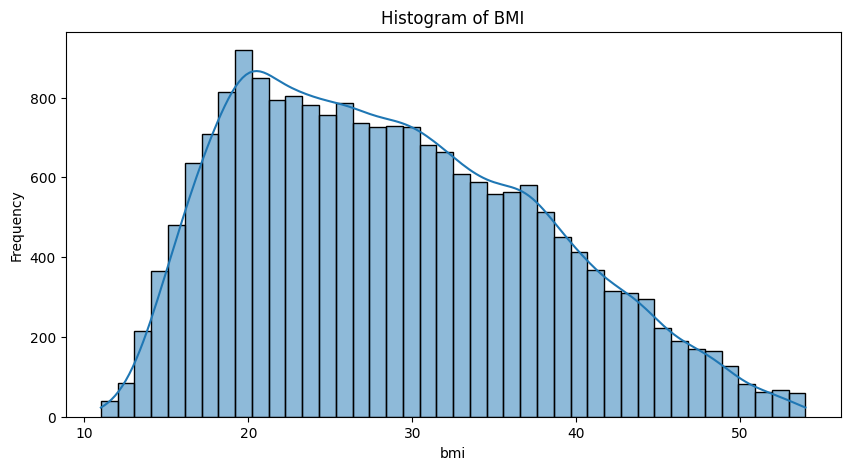

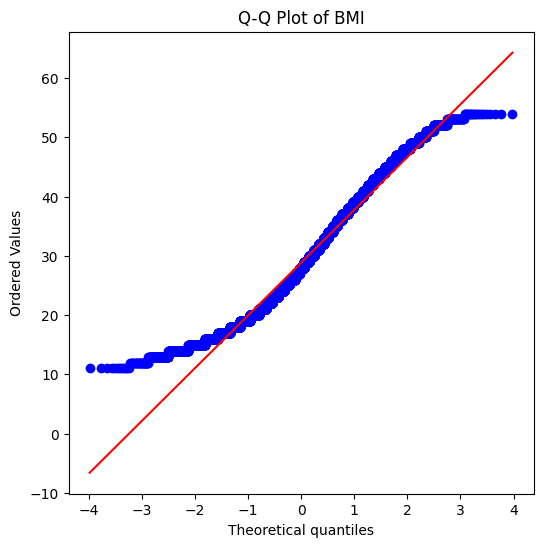

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Extract relevant columns
bmi = df['bmi']

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(bmi, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('bmi')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(bmi, dist="norm", plot=plt)
plt.title('Q-Q Plot of BMI')
plt.show()


age at consultation disribution

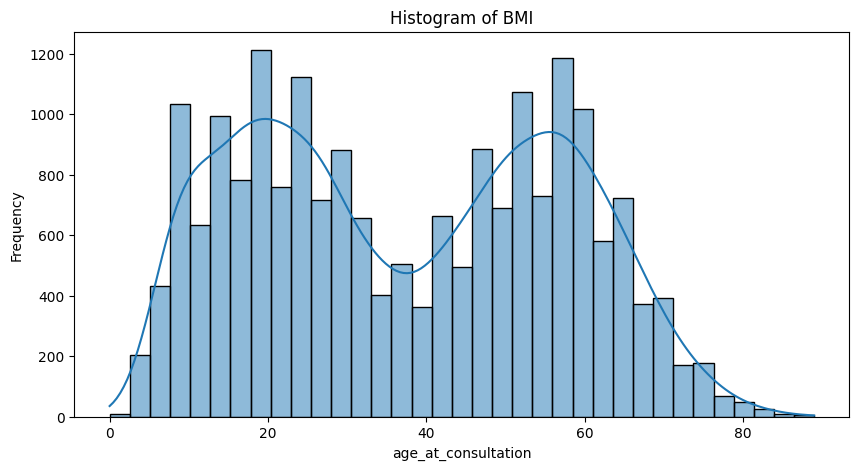

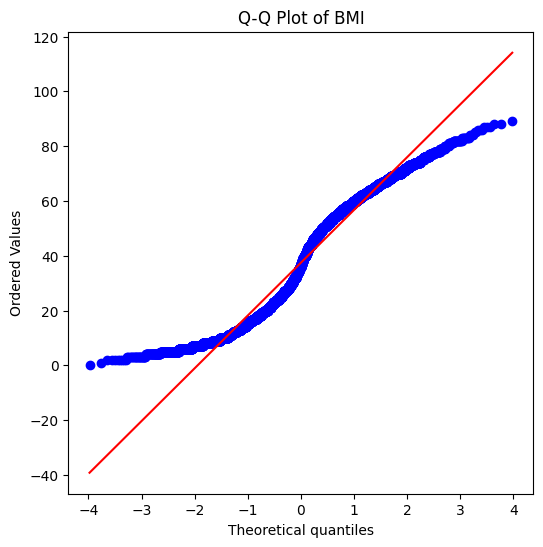

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Extract relevant columns
bmi = df['age_at_consultation']

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(bmi, kde=True)
plt.title('Histogram of BMI')
plt.xlabel('age_at_consultation')
plt.ylabel('Frequency')
plt.show()

# Q-Q Plot
plt.figure(figsize=(6, 6))
stats.probplot(bmi, dist="norm", plot=plt)
plt.title('Q-Q Plot of BMI')
plt.show()


state and marital status

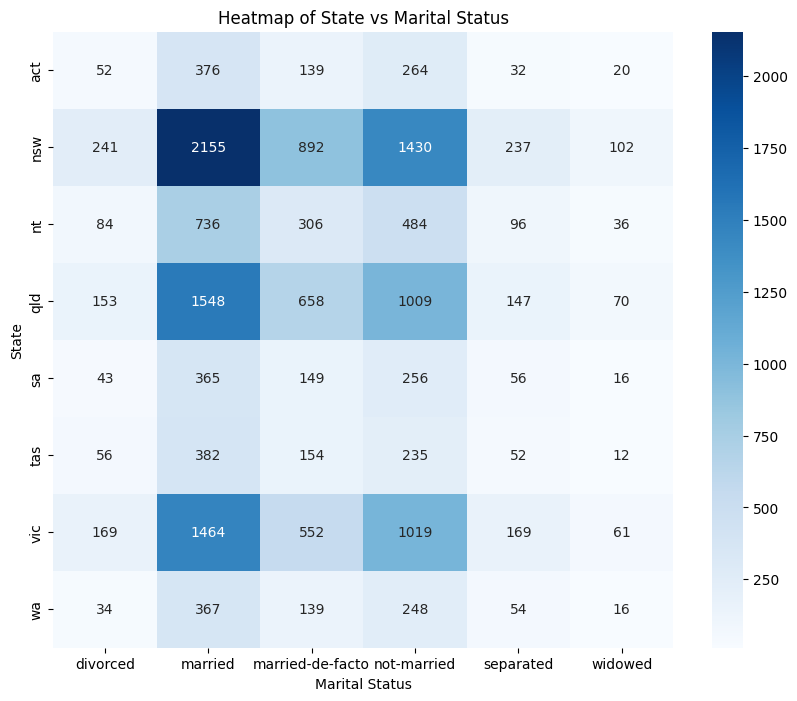

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Create a cross-tabulation table of State and Marital Status
cross_tab = pd.crosstab(df['state'], df['marital_status'])

# Plotting a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Heatmap of State vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('State')
plt.show()


stacked bar chart

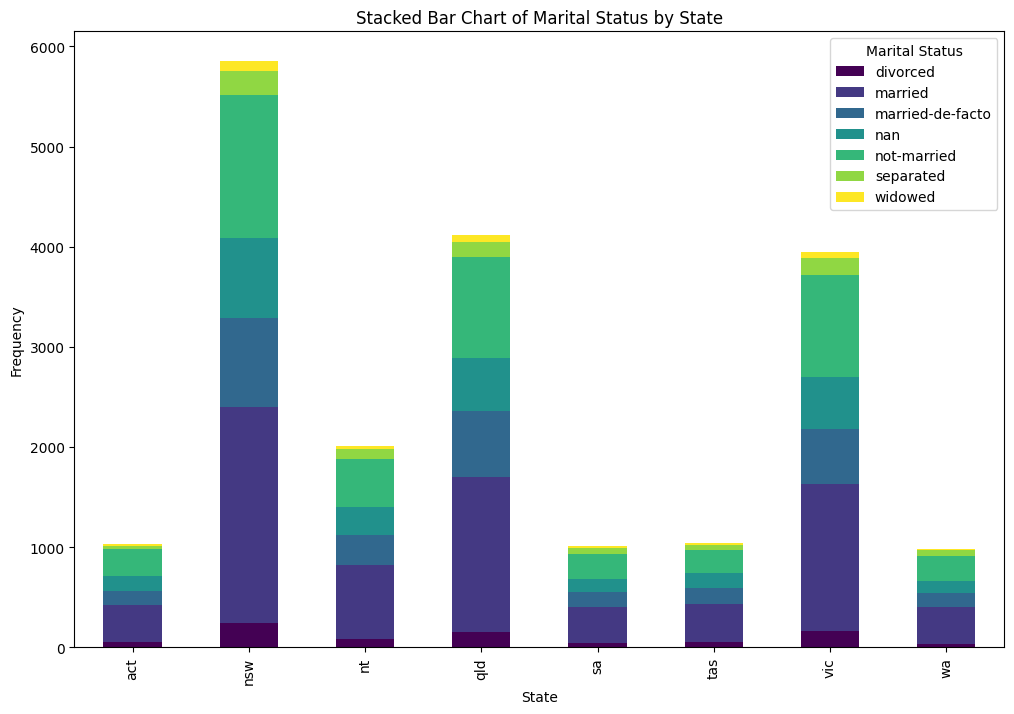

In [24]:
# Plotting a stacked bar chart
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Stacked Bar Chart of Marital Status by State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.legend(title='Marital Status')
plt.show()



Clustered Bar Chart

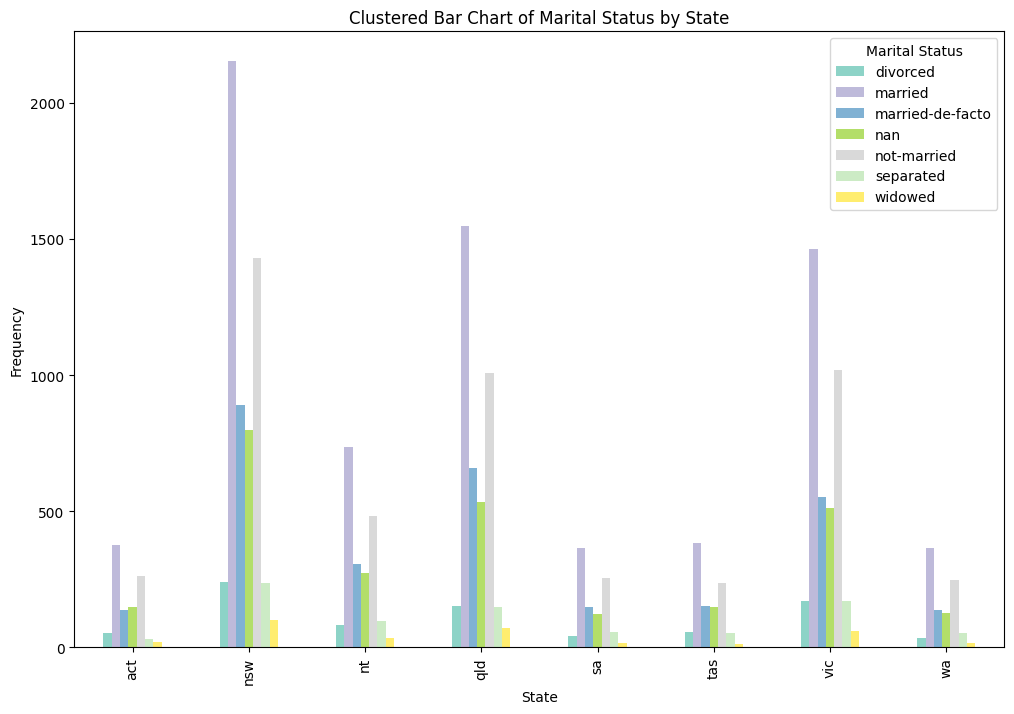

In [25]:
# Plotting a clustered bar chart
cross_tab.plot(kind='bar', figsize=(12, 8), colormap='Set3')
plt.title('Clustered Bar Chart of Marital Status by State')
plt.xlabel('State')
plt.ylabel('Frequency')
plt.legend(title='Marital Status')
plt.show()


Cramér's V 

In [30]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Create a contingency table
contingency_table = pd.crosstab(df['state'], df['marital_status'])
# print(contingency_table)
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")
print(f"chi2: {chi2}")
print(f"p : {p}")

Cramér's V: 0.022432698156446176
chi2: 43.617108919667544
p : 0.1505497736498607


 Theil's U

In [27]:
import pandas as pd
import numpy as np
from collections import Counter

def conditional_entropy(x, y):
    # Calculate the conditional entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter:
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * np.log(p_y / p_xy)
    return entropy

def theils_u(x, y):
    # Calculate Theil's U statistic
    s_xy = conditional_entropy(x, y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = np.array(list(x_counter.values())) / total_occurrences
    s_x = -np.sum(p_x * np.log(p_x))
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Calculate Theil's U
u_state_given_marital = theils_u(df['state'], df['marital_status'])
u_marital_given_state = theils_u(df['marital_status'], df['state'])

print(f"Theil's U (state given marital status): {u_state_given_marital}")
print(f"Theil's U (marital status given state): {u_marital_given_state}")


Theil's U (state given marital status): 0.0006461743974296878
Theil's U (marital status given state): 0.0007438716469774468


task4.3 a completeness

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Calculate completeness for 'middle name'
total_values_middle_name = df['middle_name'].count()  # Total non-missing values
total_possible_values_middle_name = len(df)  # Total values
completeness_middle_name = total_values_middle_name / total_possible_values_middle_name

# Calculate completeness for 'email'
total_values_email = df['email'].count()  # Total non-missing values
total_possible_values_email = len(df)  # Total values
completeness_email = total_values_email / total_possible_values_email

print(f"Completeness for 'middle name': {completeness_middle_name:.2%}")
print(f"Completeness for 'email': {completeness_email:.2%}")


Completeness for 'middle name': 90.18%
Completeness for 'email': 70.65%


task 4.3 b validity

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Calculate validity for 'weight'
def is_valid_weight(weight):
    return pd.notnull(weight) and (0 <= weight <= 500)

valid_weight = df['weight'].apply(is_valid_weight)
valid_weight_count = valid_weight.sum()
total_weight_count = df['weight'].notnull().sum()  # Only consider non-empty weights
validity_weight = valid_weight_count / total_weight_count

# Calculate validity for 'email'
def is_valid_email(email):
    return pd.notnull(email) and '@' in email

valid_email = df['email'].apply(is_valid_email)
valid_email_count = valid_email.sum()
total_email_count = df['email'].notnull().sum()  # Only consider non-empty emails
validity_email = valid_email_count / total_email_count

print(f"Validity for 'weight': {validity_weight:.2%}")
print(f"Validity for 'email': {validity_email:.2%}")


Validity for 'weight': 90.09%
Validity for 'email': 84.86%


Uniqueness for first name.

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Calculate uniqueness for 'first name'
total_values_first_name = len(df['first_name'])  # Total number of values (including duplicates)
unique_values_first_name = df['first_name'].nunique()  # Number of unique values
uniqueness_first_name = unique_values_first_name / total_values_first_name

print(f"Uniqueness for 'first name': {uniqueness_first_name:.2%}")


Uniqueness for 'first name': 18.09%


Consistency between age at consultation and birth date (for valid age values).

In [8]:
import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Convert 'birth_date' to datetime format using the correct format
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%d/%m/%Y')

# Convert 'consultation_timestamp' to datetime format
df['consultation_timestamp'] = pd.to_datetime(df['consultation_timestamp'], format='%Y-%m-%dT%H:%M%z', errors='coerce')

# Drop rows where 'consultation_timestamp' is NaT due to parsing errors
df = df.dropna(subset=['consultation_timestamp'])

# Extract the consultation date (ignoring the time part)
df['consultation_date'] = df['consultation_timestamp'].dt.date

# Calculate the expected age at consultation
df['calculated_age'] = df['consultation_date'].apply(lambda x: x.year) - df['birth_date'].dt.year - (
    ((df['consultation_date'].apply(lambda x: x.month) < df['birth_date'].dt.month) |
    ((df['consultation_date'].apply(lambda x: x.month) == df['birth_date'].dt.month) &
    (df['consultation_date'].apply(lambda x: x.day) < df['birth_date'].dt.day)))
)

# Define a function to check consistency
def is_consistent_age(row):
    return row['calculated_age'] == row['age_at_consultation']

# Apply the consistency check function to each row where 'age at consultation' is not null
valid_age = df['age_at_consultation'].notnull()
consistent_age = df[valid_age].apply(is_consistent_age, axis=1)

# Calculate the consistency ratio
consistency_ratio = consistent_age.mean()

print(f"Consistency between 'age at consultation' and 'birth date': {consistency_ratio:.2%}")


Consistency between 'age at consultation' and 'birth date': 46.31%


In [18]:
import pandas as pd
from datetime import datetime

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

# Convert 'birth_date' to datetime format using the correct format
df['birth_date'] = pd.to_datetime(df['birth_date'], format='%d/%m/%Y')

# Convert 'consultation_timestamp' to datetime format
df['consultation_timestamp'] = pd.to_datetime(df['consultation_timestamp'], format='%Y-%m-%dT%H:%M%z', errors='coerce')

# Drop rows where 'consultation_timestamp' is NaT due to parsing errors
df = df.dropna(subset=['consultation_timestamp'])

# Extract the consultation date (ignoring the time part)
df['consultation_date'] = df['consultation_timestamp'].dt.date

# Calculate the expected age at consultation
df['calculated_age'] = df['consultation_date'].apply(lambda x: x.year) - df['birth_date'].dt.year - (
    ((df['consultation_date'].apply(lambda x: x.month) < df['birth_date'].dt.month) |
    ((df['consultation_date'].apply(lambda x: x.month) == df['birth_date'].dt.month) &
    (df['consultation_date'].apply(lambda x: x.day) < df['birth_date'].dt.day)))
)

# Validate both the calculated age and the recorded age at consultation
df['valid_calculated_age'] = df['calculated_age'] < 150
df['valid_recorded_age'] = df['age_at_consultation'] < 150

# Only consider rows with valid ages in both fields
valid_rows = df[df['valid_calculated_age'] & df['valid_recorded_age'] & df['age_at_consultation'].notnull()]

# Define a function to check consistency
def is_consistent_age(row):
    return row['calculated_age'] == row['age_at_consultation']

# Apply the consistency check function to each row with valid 'age at consultation'
consistent_age = valid_rows.apply(is_consistent_age, axis=1)

# Calculate the consistency ratio
consistency_ratio = consistent_age.mean()

print(f"Consistency between 'age_at_consultation' and 'birth date': {consistency_ratio:.2%}")


Consistency between 'age_at_consultation' and 'birth date': 46.31%


first digits (Benford’s law)

In [19]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('data_wrangling_medical_2024_u7568823.csv')

def calculate_first_digit_distribution(series):
    # Convert series to string and get the first character after stripping whitespace
    first_digits = series.dropna().astype(str).str.strip().str[0]
    
    # Filter only digit characters and convert back to numeric
    first_digits = first_digits[first_digits.str.isdigit()].astype(int)
    
    # Calculate the distribution of first digits
    digit_counts = first_digits.value_counts(normalize=True) * 100
    
    # Round the results to one decimal place
    digit_distribution = digit_counts.sort_index().round(1)
    
    return digit_distribution

# Calculate distributions for each attribute
cholesterol_distribution = calculate_first_digit_distribution(df['cholesterol_level'])
blood_pressure_distribution = calculate_first_digit_distribution(df['blood_pressure'])
medicare_number_distribution = calculate_first_digit_distribution(df['medicare_number'])

# Display the results
print("First Digit Distribution for Cholesterol Level:\n", cholesterol_distribution)
print("First Digit Distribution for Blood Pressure:\n", blood_pressure_distribution)
print("First Digit Distribution for Medicare Number:\n", medicare_number_distribution)

# Expected Benford's Law Distribution
benford_distribution = {d: np.log10(1 + 1/d) * 100 for d in range(1, 10)}
benford_distribution = pd.Series(benford_distribution).round(1)
print("\nExpected Benford's Law Distribution:\n", benford_distribution)


KeyError: 'cholesterol level'